# Linear Models

In [34]:
from IPython.display import display
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
%matplotlib inline

## Linear models for regression

### Ordinary Least Squares

In [35]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston() # bonton 집값 데이터셋
print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape), end="\n\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Data shape: (506, 104)
Target shape: (506,)

Training set score: 0.95
Test set score: 0.61


- 훈련데이터 셋에 대해서는 높은 정확도 & 테스트 데이터셋에 대해서 낮은 정확도 --> Overfitting
- 최소제곱 기반의 단순 선형 회귀 모델로는 이러한 Overfitting 문제를 해결하기 쉽지 않음
- 가중치에 규제(Regularization)를 가하여 Generalization을 높인다.

In [36]:
y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)
print(y_pred)

[ 23.67394352  26.73733042  29.6586909   10.10275664  19.59101837
  19.70878389  22.0287693   20.85690671  11.71749972  18.1524927
   5.00667537  13.3634182   14.11487871   8.25200326  48.90690964
  35.5412842   23.64867971  37.22367366  32.32461834  22.45567918
  25.06153449  21.32412127  20.89829133  27.32922082  18.20140623
  30.47069696  16.38759646  18.19155718  34.54912589  13.89915753
  16.53252557  18.22499565  20.04666859  19.63967212  26.43190609
  16.3250263    6.88385019  36.83820886  16.78766731  13.48695692
  22.17938389  19.85031849  19.73400253  18.8653239   11.80464309
  22.26923411  17.91489138   9.77583193  12.43883764  23.10311951
 -26.17294746  25.13148237  20.66741167  52.22319535   5.86785678
  21.17366226  16.66757015  17.89836638  17.98992683  19.83442824
  23.97499816  21.06572453  33.1664807   29.2042193   19.5259977
  30.74941304  15.30650142  19.38675369  14.2287333   21.02762934
  18.04243735  21.70292002  27.28383989  29.53659366  28.01894022
   9.4183071

### Ridge regression

- L2 규제 (L2 Regularization):
  - 모든 가중치 값들을 가능한 0에 가깝게 되도록 조정하여, 각 특성이 prediction값에 주는 영향을 낮춘다.
    - alpha: 규제의 강한 정도를 조정하는 하이퍼파라미터
    - alpha 값이 커지면 규제가 강화됨
    - alpha 값이 작으면 규제가 약화됨
      - alpha = 0 --> 규제가 없음 --> 가중치 값의 자유도가 상승함 --> Overfitting 발생

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


- Ridge regression은 Ordinary Least Squares와 비교했을 때 학습 데이터셋에 대해서는 상대적으로 낮은 정확도를, 테스트 데이터셋에 대해서는 상대적으로 높은 정확도를 보인다.

In [38]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


- alpha값을 높게 잡을 경우 가중치가 끼치는 영향력이 감소

In [39]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


- 적절한 alpha값을 찾는 것는 것이 중요한 이슈가 된다.

## Linear models for Classification

- LogisticRegression과 LinearSVC이 있음
    - C: 규제의 강한 정도를 조정하는 하이퍼파라미터
      - defulat값: 1.0

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("Shape of cancer data: {}".format(cancer.data.shape), end="\n\n")

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Shape of cancer data: (569, 30)

Training set score: 0.953
Test set score: 0.958


In [41]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.969
Test set score: 0.965


- 높은 C 값: 규제의 감소 --> 훈련 데이터셋에 최대한 맞춤

In [42]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


- 낮은 C 값: 규제의 증대 --> 가중치를 최대한 0에 가깝게 만듦

In [43]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
print(y_pred)

[1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


### Linear models for multiclass classification

- 클래스 하나를 분류하기 위하여 이진 분류기를 생성함
- 여러 개의 클래스를 분류하기 위하여 이진 분류기 여러 개가 생성됨

Data shape: (100, 2)
Target shape: (100,)


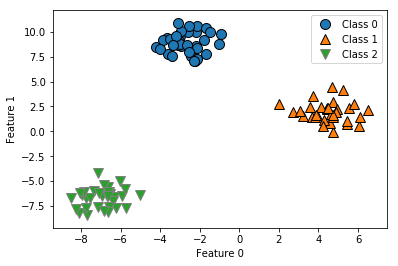

In [44]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [45]:
# target label
print(y[0])
print(y[1])
print(y[2])

2
1
0


In [46]:
linear_svm = LinearSVC().fit(X, y)

print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


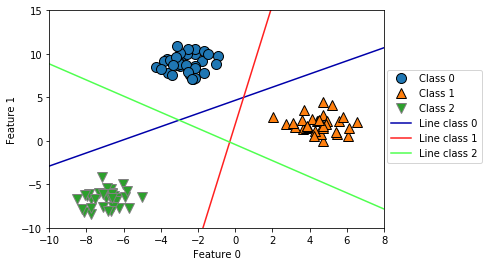

In [47]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

- 유의사항
  - alpha값과 C값은 보통 로그스케일로 정함